## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = keras.layers.Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.5, 0.75]

In [15]:
results = {}
for dp in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Dropout_EXP_rate %.2f" %(dp))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dp)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "exp-dp-%.2f" %(dp)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Dropout_EXP_rate 0.25
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1

50000/50000 [==============================] - 21s 428us/step - loss: 1.6687 - accuracy: 0.3998 - val_loss: 1.6257 - val_accuracy: 0.4402
Epoch 43/50
50000/50000 [==============================] - 21s 421us/step - loss: 1.6616 - accuracy: 0.4050 - val_loss: 1.6037 - val_accuracy: 0.4372
Epoch 44/50
50000/50000 [==============================] - 23s 470us/step - loss: 1.6589 - accuracy: 0.4047 - val_loss: 1.5936 - val_accuracy: 0.4376
Epoch 45/50
50000/50000 [==============================] - 21s 429us/step - loss: 1.6578 - accuracy: 0.4057 - val_loss: 1.6142 - val_accuracy: 0.4269
Epoch 46/50
50000/50000 [==============================] - 21s 430us/step - loss: 1.6631 - accuracy: 0.4062 - val_loss: 1.5824 - val_accuracy: 0.4379
Epoch 47/50
50000/50000 [==============================] - 25s 495us/step - loss: 1.6525 - accuracy: 0.4074 - val_loss: 1.5796 - val_accuracy: 0.4407
Epoch 48/50
50000/50000 [==============================] - 28s 565us/step - loss: 1.6520 - accuracy: 0.4125 - va

50000/50000 [==============================] - 19s 388us/step - loss: 2.1261 - accuracy: 0.1665 - val_loss: 2.2278 - val_accuracy: 0.1348
Epoch 34/50
50000/50000 [==============================] - 19s 374us/step - loss: 2.1264 - accuracy: 0.1679 - val_loss: 2.2004 - val_accuracy: 0.1451
Epoch 35/50
50000/50000 [==============================] - 19s 372us/step - loss: 2.1257 - accuracy: 0.1691 - val_loss: 2.1717 - val_accuracy: 0.1561
Epoch 36/50
50000/50000 [==============================] - 19s 373us/step - loss: 2.1251 - accuracy: 0.1698 - val_loss: 2.1958 - val_accuracy: 0.1432
Epoch 37/50
50000/50000 [==============================] - 19s 379us/step - loss: 2.1236 - accuracy: 0.1695 - val_loss: 2.1929 - val_accuracy: 0.1466
Epoch 38/50
50000/50000 [==============================] - 19s 375us/step - loss: 2.1316 - accuracy: 0.1689 - val_loss: 2.2173 - val_accuracy: 0.1403
Epoch 39/50
50000/50000 [==============================] - 19s 374us/step - loss: 2.1222 - accuracy: 0.1705 - va

50000/50000 [==============================] - 17s 334us/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 20/50
50000/50000 [==============================] - 17s 331us/step - loss: 2.3026 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 21/50
50000/50000 [==============================] - 17s 333us/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 22/50
50000/50000 [==============================] - 17s 331us/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 23/50
50000/50000 [==============================] - 17s 331us/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 24/50
50000/50000 [==============================] - 17s 330us/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 25/50
50000/50000 [==============================] - 16s 330us/step - loss: 2.3027 - accuracy: 0.0975 - va

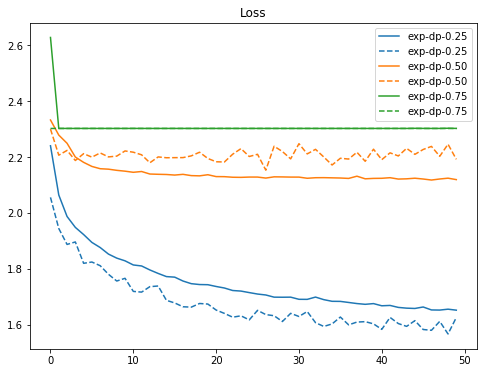

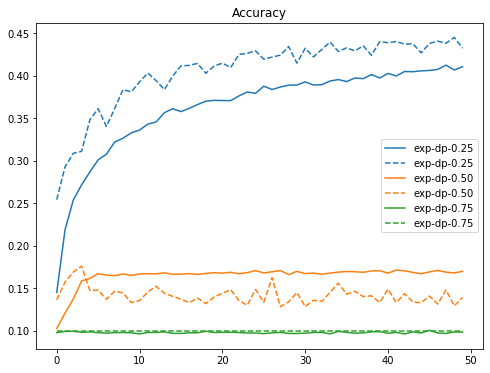

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = []
for i in range(0,3):
    color_bar.append('C' + str(i))

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'],'-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'],'--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'],'-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'],'--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Accuracy")
plt.show()